# Assignment 3.1 - Q-Learning for Frozen-walk game

This assignment aims at familiarizing you with training, validating and testing a reinforncement learning agent using Q-Learning. Here are the requirements of the assignment:

- Initiate a Frozen lake environment.
- Initiate an agent.
- Train the agent using <b>Q-Learning</b>.
- Print out the optimal policy, i.e., what is the best action at a stage.
- Compare and discuss the performance of the optimal policy obtained by Q-Learning with the optimal policy obtained by Deep Q-Learning in the demo.

Frozen lake involves crossing a frozen lake from start to goal without falling into any holes by walking over the frozen lake. The player may not always move in the intended direction due to the slippery nature of the frozen lake.

![Frozen walk](https://gymnasium.farama.org/_images/frozen_lake.gif)

More details can be found at https://gymnasium.farama.org/environments/toy_text/frozen_lake/.

### Submission {-}
The structure of submission folder should be organized as follows:

- ./\<StudentID>-assignment3-1-notebook.ipynb: Jupyter notebook containing source code.

### Evaluation {-}
Assignment evaluation will be conducted on how you accomplish the assignment requirements. In addition, your code should conform to a Python coding convention such as PEP-8.

### Deadline {-}
Please visit Canvas for details.

### Install libraries and initiate a frozen lake map

In [ ]:
# Install gymnasium game environment
!pip install gymnasium
!pip install gymnasium[toy-text]

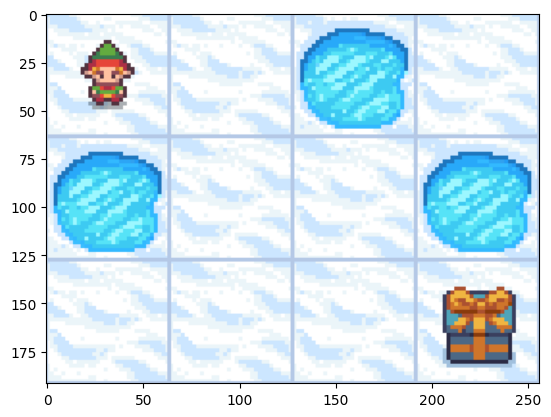

In [ ]:
### Please do not change this code

# Load libraries
import gymnasium as gym
import matplotlib.pyplot as plt

# Define environment map
custom_map = [
    'SFHF',
    'HFFH',
    'FFFG'
]

# Initialize the environment\
env = gym.make('FrozenLake-v1', desc=custom_map, is_slippery=False, render_mode='rgb_array')
state_size = env.observation_space.n    # Number of states
action_size = env.action_space.n    # Number of actions of this game: four, 0: left, 1:down, 2: right, 3: up.
env.reset()    # Reset environment, i.e., set agent position to state 0
plt.imshow(env.render())    # Visualize environment map

### Solution

In [ ]:
import numpy as np
import random
import torch
import imageio
import pandas as pd


In [ ]:
action_size = env.action_space.n
state_size = env.observation_space.n

In [ ]:
qtable = np.zeros([state_size, action_size])


In [ ]:
reward_episodes = []    # Track rewards over episodes
step_episodes = []    # Track number of steps (in each episode until termination) over episodes

# Hyperparameters
episodes = 500        # Total number of episodes
alpha = 0.5            # Learning rate
gamma = 0.9            # Discount factor
max_steps = 50

# Training
for episode in range(episodes):
    state, p = env.reset()
    done = False

    img_lst = [env.render()]    # Initialize list to store visualization frames
    # Until the agent gets stuck in a hole or reaches the goal, keep training it
    for step in range(max_steps):
        # Choose the action with the highest value in the current state
        if np.max(qtable[state]) > 0:
          action = np.argmax(qtable[state])

        # If there's no best action (only zeros), take a random one
        else:
          action = env.action_space.sample()

        # Implement this action and move the agent in the desired direction
        new_state, reward, done, info, prob = env.step(action)

        # Update Q(s,a)
        qtable[state, action] = qtable[state, action] + alpha * (reward + gamma * np.max(qtable[new_state]) - qtable[state, action])

        # Update our current state
        state = new_state

        # Render map imgage for visualization every K episodes
        if episode % 50 == 0:
            animation_file = "training_episode_" + str(episode) + "_steps_" + str(step) + ".gif"
            img = env.render()    # Render current environment image
            img_lst.append(img)    # Append environment images to make animation

        # If we have a reward, it means that our outcome is a success
        if done:
          break

    print("Episode: " + str(episode) + ", Steps: " + str(step) + ", epsilon: " + ", Reward: " + str(reward))
    reward_episodes.append(reward)    # Add reward to list for tracking purpose
    step_episodes.append(step)    # Add step to list for tracking purpose

    ### Write animation of the training episode (n*K)th
    if len(img_lst)>1:
        imageio.mimsave(animation_file, img_lst, format='GIF', duration=0.5)

print('Average success rate of training episodes: ', round(np.mean(reward_episodes),2))

Episode: 0, Steps: 4, epsilon: , Reward: 0.0
Episode: 1, Steps: 3, epsilon: , Reward: 0.0
Episode: 2, Steps: 0, epsilon: , Reward: 0.0
Episode: 3, Steps: 2, epsilon: , Reward: 0.0
Episode: 4, Steps: 2, epsilon: , Reward: 0.0
Episode: 5, Steps: 2, epsilon: , Reward: 0.0
Episode: 6, Steps: 0, epsilon: , Reward: 0.0
Episode: 7, Steps: 0, epsilon: , Reward: 0.0
Episode: 8, Steps: 1, epsilon: , Reward: 0.0
Episode: 9, Steps: 3, epsilon: , Reward: 0.0
Episode: 10, Steps: 6, epsilon: , Reward: 0.0
Episode: 11, Steps: 3, epsilon: , Reward: 0.0
Episode: 12, Steps: 1, epsilon: , Reward: 0.0
Episode: 13, Steps: 7, epsilon: , Reward: 0.0
Episode: 14, Steps: 5, epsilon: , Reward: 0.0
Episode: 15, Steps: 5, epsilon: , Reward: 1.0
Episode: 16, Steps: 7, epsilon: , Reward: 0.0
Episode: 17, Steps: 3, epsilon: , Reward: 0.0
Episode: 18, Steps: 0, epsilon: , Reward: 0.0
Episode: 19, Steps: 8, epsilon: , Reward: 0.0
Episode: 20, Steps: 7, epsilon: , Reward: 1.0
Episode: 21, Steps: 4, epsilon: , Reward: 0.

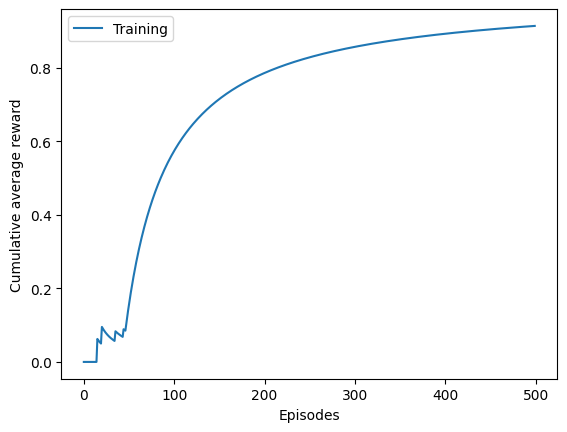

In [ ]:
# Plot cumulative average reward (or success rate) of the training phase.
# This shows how well the agent performs in the training phase.
df_reward_episodes = pd.DataFrame(reward_episodes)
cumulative_average_rewards = df_reward_episodes.expanding().mean()
plt.plot(cumulative_average_rewards)
plt.ylabel('Cumulative average reward')
plt.xlabel('Episodes')
plt.legend(['Training'], loc='upper left')
plt.rcParams.update({'font.size': 10})
plt.show()

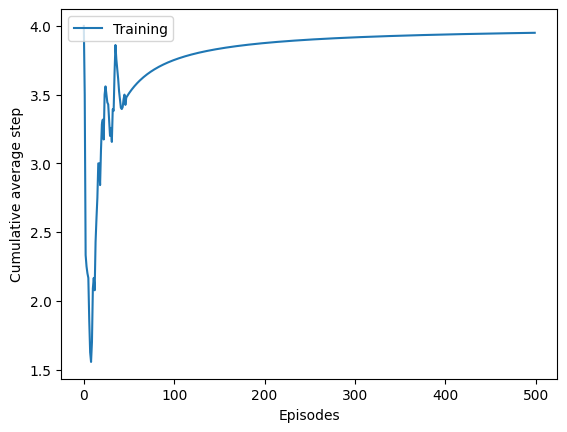

In [ ]:
# Plot cumulative average steps of the training phase.
# This shows how well the agent performs in the training phase.
df_step_episodes = pd.DataFrame(step_episodes)
cumulative_average_steps = df_step_episodes.expanding().mean()
plt.plot(cumulative_average_steps)
plt.ylabel('Cumulative average step')
plt.xlabel('Episodes')
plt.legend(['Training'], loc='upper left')
plt.rcParams.update({'font.size': 10})
plt.show()

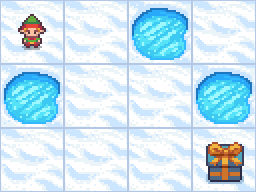

In [ ]:
# Display test result animation
from IPython.display import Image
Image('training_episode_450_steps_4.gif')

# Discussion

- The path of Q-learning and Deep Q-learning is different, but they still perform using 4 steps 